In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

import pandas_profiling as pandas_prof

#encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

#Scaling
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

#Split Data for Train & Test
from sklearn.model_selection import train_test_split

#model Training & Testing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#model Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data =  pd.read_csv('horse.csv')
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


## Data Preparation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [4]:
data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [5]:
data.describe(include=object)

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
count,299,299,243,230,252,267,244,255,243,195,193,197,181,134,299,299,299
unique,2,2,4,4,6,3,5,4,4,3,3,4,5,3,3,2,2
top,yes,adult,cool,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,cloudy,lived,yes,no
freq,180,275,108,114,79,187,67,127,75,101,119,79,78,47,178,190,200


In [6]:
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [7]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [8]:
for i in data.columns:
    p = (data[i].isnull().sum()/len(data))*100
    print('the column {0} have {1} percent of NAN values'.format(i,p.round(2)))
    print()


the column surgery have 0.0 percent of NAN values

the column age have 0.0 percent of NAN values

the column hospital_number have 0.0 percent of NAN values

the column rectal_temp have 20.07 percent of NAN values

the column pulse have 8.03 percent of NAN values

the column respiratory_rate have 19.4 percent of NAN values

the column temp_of_extremities have 18.73 percent of NAN values

the column peripheral_pulse have 23.08 percent of NAN values

the column mucous_membrane have 15.72 percent of NAN values

the column capillary_refill_time have 10.7 percent of NAN values

the column pain have 18.39 percent of NAN values

the column peristalsis have 14.72 percent of NAN values

the column abdominal_distention have 18.73 percent of NAN values

the column nasogastric_tube have 34.78 percent of NAN values

the column nasogastric_reflux have 35.45 percent of NAN values

the column nasogastric_reflux_ph have 82.27 percent of NAN values

the column rectal_exam_feces have 34.11 percent of NAN 

C:\Users\Bunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


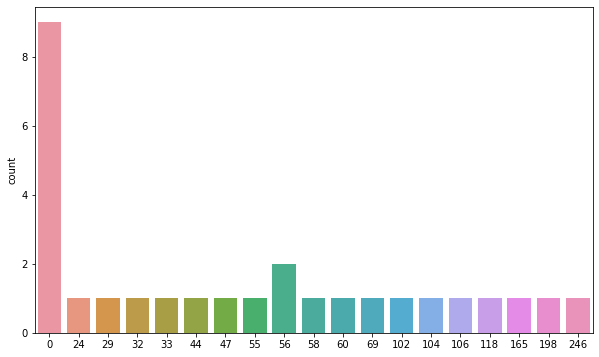

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data.isnull().sum())
plt.show()

<AxesSubplot:>

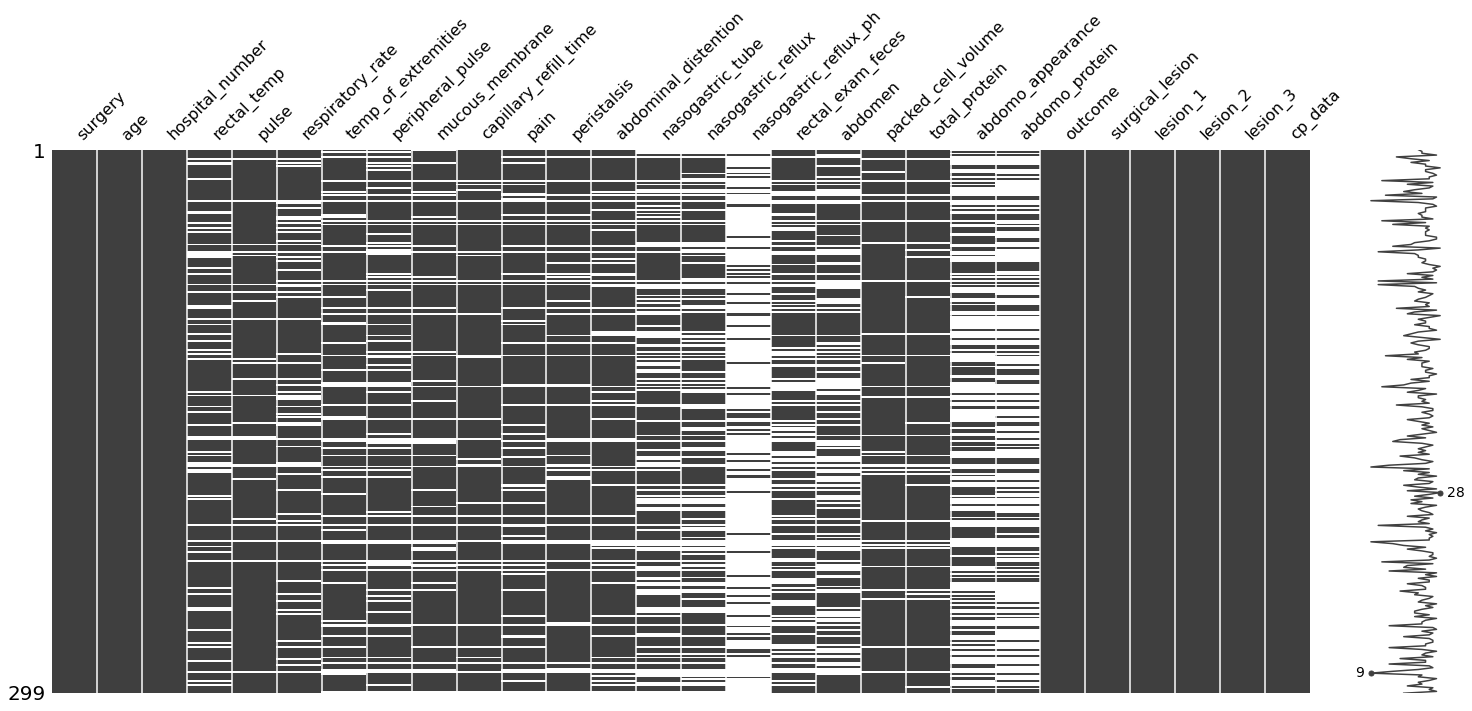

In [10]:
import missingno as msno
msno.matrix(data)

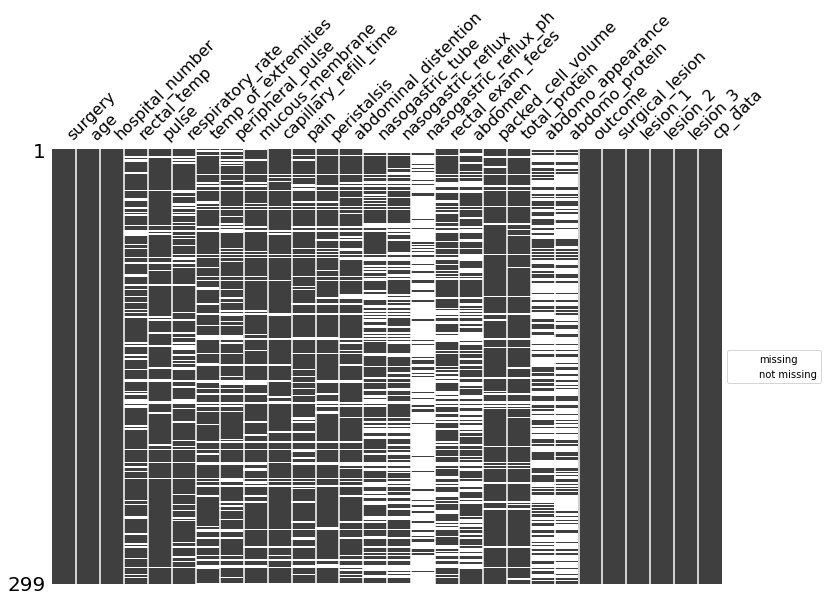

In [11]:
import missingno as msno

msno.matrix(data, figsize=(12,8), sparkline=False, p=0);
plt.legend(['missing','not missing'],loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
data.select_dtypes(include=object)

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,NaN,died,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,cloudy,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,NaN,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,serosanguious,died,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,distend_large,NaN,euthanized,no,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,euthanized,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,NaN,died,yes,no
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,lived,yes,yes


In [13]:
data.select_dtypes(include=object).columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data'],
      dtype='object')

In [14]:
print('Null value object features')


data.select_dtypes(include=object).isnull().sum()

Null value object features


surgery                    0
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
outcome                    0
surgical_lesion            0
cp_data                    0
dtype: int64

In [15]:
data.select_dtypes(include=object).isnull().columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data'],
      dtype='object')

In [16]:
data.select_dtypes(exclude=object)

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,0
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,0
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,0
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,0


In [17]:
print('Null value numerical features')
data.select_dtypes(exclude=object).isnull().sum()

Null value numerical features


hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
nasogastric_reflux_ph    246
packed_cell_volume        29
total_protein             33
abdomo_protein           198
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64

In [18]:
data.select_dtypes(exclude=object).isnull().columns

Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [19]:
data.duplicated().any()

False

In [20]:
data.corr()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
hospital_number,1.000000,0.144118,0.379607,0.273350,-0.005577,-0.093508,-0.228843,-0.044184,0.145397,-0.050433,-0.020950
rectal_temp,0.144118,1.000000,0.218868,0.268846,0.228306,0.065101,-0.060817,0.009343,0.062639,-0.062876,0.029336
pulse,0.379607,0.218868,1.000000,0.469368,0.005796,0.405660,-0.086533,0.020937,0.079332,-0.001899,0.101412
respiratory_rate,0.273350,0.268846,0.469368,1.000000,0.127164,0.086394,-0.090743,-0.074056,0.180250,-0.020601,0.144773
nasogastric_reflux_ph,-0.005577,0.228306,0.005796,0.127164,1.000000,-0.131044,-0.717363,0.539505,0.089207,NaN,NaN
packed_cell_volume,-0.093508,0.065101,0.405660,0.086394,-0.131044,1.000000,-0.053075,0.152736,-0.068743,-0.077727,-0.066180
total_protein,-0.228843,-0.060817,-0.086533,-0.090743,-0.717363,-0.053075,1.000000,-0.517338,-0.181468,0.223892,0.066856
abdomo_protein,-0.044184,0.009343,0.020937,-0.074056,0.539505,0.152736,-0.517338,1.000000,-0.032938,-0.153246,-0.104158
lesion_1,0.145397,0.062639,0.079332,0.180250,0.089207,-0.068743,-0.181468,-0.032938,1.000000,0.005966,0.005850
lesion_2,-0.050433,-0.062876,-0.001899,-0.020601,NaN,-0.077727,0.223892,-0.153246,0.005966,1.000000,0.269374


In [88]:
#sns.pairplot(data.corr())

## Data Pre-Processing

### Handling Missing data
#### Object Features

In [22]:
missing_object_features = data[['temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance']]

In [23]:
missing_object_features.isnull().sum()

temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
dtype: int64

In [24]:
for col in missing_object_features:
    data[col] = data[col].fillna(method='ffill')
    data[col] = data[col].fillna(method='bfill')

In [25]:
data.select_dtypes(include=object).isnull().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
outcome                  0
surgical_lesion          0
cp_data                  0
dtype: int64

In [26]:
data.select_dtypes(include=object)

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,none,less_1_liter,decreased,distend_large,cloudy,died,no,no
1,yes,adult,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,none,less_1_liter,absent,other,cloudy,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,none,less_1_liter,normal,normal,cloudy,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,normal,serosanguious,died,yes,yes
4,no,adult,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,normal,serosanguious,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,slight,none,decreased,distend_large,cloudy,euthanized,no,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,euthanized,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,serosanguious,died,yes,no
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,lived,yes,yes


In [27]:
missing_features_num = data[['rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', ]]

In [28]:
missing_features_num.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein
0,38.5,66.0,28.0,NaN,45.0,8.4,NaN
1,39.2,88.0,20.0,NaN,50.0,85.0,2.0
2,38.3,40.0,24.0,NaN,33.0,6.7,NaN
3,39.1,164.0,84.0,5.0,48.0,7.2,5.3
4,37.3,104.0,35.0,NaN,74.0,7.4,NaN


In [29]:
data.rectal_temp = data.rectal_temp.fillna(data['rectal_temp'].mean())
data['rectal_temp'].isnull().sum()

0

In [30]:
data.pulse = data.pulse.fillna(data['pulse'].mean())
data['pulse'].isnull().sum()

0

In [31]:
data.respiratory_rate = data.respiratory_rate.fillna(data['respiratory_rate'].mean())
data['respiratory_rate'].isnull().sum()

0

In [32]:
data.nasogastric_reflux_ph = data.nasogastric_reflux_ph.fillna(data['nasogastric_reflux_ph'].mean())
data['nasogastric_reflux_ph'].isnull().sum()

0

In [33]:
data.packed_cell_volume = data.packed_cell_volume.fillna(data['packed_cell_volume'].mean())
data['packed_cell_volume'].isnull().sum()

0

In [34]:
data.total_protein = data.total_protein.fillna(data['total_protein'].mean())
data['total_protein'].isnull().sum()

0

In [35]:
data.abdomo_protein = data.abdomo_protein.fillna(data['abdomo_protein'].mean())
data['abdomo_protein'].isnull().sum()

0

In [36]:
data.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [37]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,none,less_1_liter,4.707547,decreased,distend_large,45.0,8.4,cloudy,3.039604,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,none,less_1_liter,4.707547,absent,other,50.0,85.0,cloudy,2.000000,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,none,less_1_liter,4.707547,normal,normal,33.0,6.7,cloudy,3.039604,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.000000,decreased,normal,48.0,7.2,serosanguious,5.300000,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,4.707547,decreased,normal,74.0,7.4,serosanguious,3.039604,died,no,4300,0,0,no


## Convert_Object_to_numeric_data

In [38]:
data.select_dtypes(include=object)

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,none,less_1_liter,decreased,distend_large,cloudy,died,no,no
1,yes,adult,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,none,less_1_liter,absent,other,cloudy,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,none,less_1_liter,normal,normal,cloudy,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,normal,serosanguious,died,yes,yes
4,no,adult,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,normal,serosanguious,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,slight,none,decreased,distend_large,cloudy,euthanized,no,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,euthanized,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,serosanguious,died,yes,no
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,serosanguious,lived,yes,yes


In [39]:
data.select_dtypes(include=object).nunique()

surgery                  2
age                      2
temp_of_extremities      4
peripheral_pulse         4
mucous_membrane          6
capillary_refill_time    3
pain                     5
peristalsis              4
abdominal_distention     4
nasogastric_tube         3
nasogastric_reflux       3
rectal_exam_feces        4
abdomen                  5
abdomo_appearance        3
outcome                  3
surgical_lesion          2
cp_data                  2
dtype: int64

In [40]:
data.select_dtypes(include=object).columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data'],
      dtype='object')

In [41]:
class_col = data[['surgery', 'age','surgical_lesion', 'cp_data']]

In [42]:
col = class_col
for i in data[['surgery', 'age','surgical_lesion', 'cp_data']]:
    lb = LabelEncoder()
    lb.fit(data[i])
    data[i] = lb.transform(data[i])

In [43]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.500000,66.0,28.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,none,less_1_liter,4.707547,decreased,distend_large,45.0,8.400000,cloudy,3.039604,died,0,11300,0,0,0
1,1,0,534817,39.200000,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,none,less_1_liter,4.707547,absent,other,50.0,85.000000,cloudy,2.000000,euthanized,0,2208,0,0,0
2,0,0,530334,38.300000,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,none,less_1_liter,4.707547,normal,normal,33.0,6.700000,cloudy,3.039604,lived,0,0,0,0,1
3,1,1,5290409,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.000000,decreased,normal,48.0,7.200000,serosanguious,5.300000,died,1,2208,0,0,1
4,0,0,530255,37.300000,104.0,35.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,4.707547,decreased,normal,74.0,7.400000,serosanguious,3.039604,died,0,4300,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886,38.168619,120.0,70.0,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,slight,none,4.707547,decreased,distend_large,55.0,65.000000,cloudy,3.039604,euthanized,0,3205,0,0,0
295,0,0,527702,37.200000,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,4.707547,absent,distend_small,44.0,24.274436,serosanguious,3.300000,euthanized,1,2208,0,0,1
296,1,0,529386,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,4.707547,decreased,distend_large,60.0,6.800000,serosanguious,3.039604,died,1,3205,0,0,0
297,1,0,530612,36.500000,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,4.707547,absent,distend_small,50.0,6.000000,serosanguious,3.400000,lived,1,2208,0,0,1


In [44]:
multi_obj_fea = data[['temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention','nasogastric_tube','nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome']]
dummies = pd.get_dummies(multi_obj_fea,prefix='col')

In [45]:
dummies

,col_cold,col_cool,col_normal,col_warm,col_absent,col_increased,col_normal,col_reduced,col_bright_pink,col_bright_red,col_dark_cyanotic,col_normal_pink,col_pale_cyanotic,col_pale_pink,col_3,col_less_3_sec,col_more_3_sec,col_alert,col_depressed,col_extreme_pain,col_mild_pain,col_severe_pain,col_absent,col_hypermotile,col_hypomotile,col_normal,col_moderate,col_none,col_severe,col_slight,col_none,col_significant,col_slight,col_less_1_liter,col_more_1_liter,col_none,col_absent,col_decreased,col_increased,col_normal,col_distend_large,col_distend_small,col_firm,col_normal,col_other,col_clear,col_cloudy,col_serosanguious,col_died,col_euthanized,col_lived
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
295,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
296,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
297,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [46]:
data = pd.concat([data,dummies],axis=1)

In [47]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,col_cold,col_cool,col_normal,col_warm,col_absent,col_increased,col_normal,col_reduced,col_bright_pink,col_bright_red,col_dark_cyanotic,col_normal_pink,col_pale_cyanotic,col_pale_pink,col_3,col_less_3_sec,col_more_3_sec,col_alert,col_depressed,col_extreme_pain,col_mild_pain,col_severe_pain,col_absent,col_hypermotile,col_hypomotile,col_normal,col_moderate,col_none,col_severe,col_slight,col_none,col_significant,col_slight,col_less_1_liter,col_more_1_liter,col_none,col_absent,col_decreased,col_increased,col_normal,col_distend_large,col_distend_small,col_firm,col_normal,col_other,col_clear,col_cloudy,col_serosanguious,col_died,col_euthanized,col_lived
0,0,0,530101,38.500000,66.0,28.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,none,less_1_liter,4.707547,decreased,distend_large,45.0,8.400000,cloudy,3.039604,died,0,11300,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,1,0,534817,39.200000,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,none,less_1_liter,4.707547,absent,other,50.0,85.000000,cloudy,2.000000,euthanized,0,2208,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,0,0,530334,38.300000,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,none,less_1_liter,4.707547,normal,normal,33.0,6.700000,cloudy,3.039604,lived,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,1,1,5290409,39.100000,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.000000,decreased,normal,48.0,7.200000,serosanguious,5.300000,died,1,2208,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,530255,37.300000,104.0,35.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,4.707547,decreased,normal,74.0,7.400000,serosanguious,3.039604,died,0,4300,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886,38.168619,120.0,70.0,cold,normal,pale_cyanotic,more_3_sec,depressed,absent,none,slight,none,4.707547,decreased,distend_large,55.0,65.000000,cloudy,3.039604,euthanized,0,3205,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
295,0,0,527702,37.200000,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,4.707547,absent,distend_small,44.0,24.274436,serosanguious,3.300000,euthanized,1,2208,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
296,1,0,529386,37.500000,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,4.707547,decreased,distend_large,60.0,6.800000,serosanguious,3.039604,died,1,3205,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
297,1,0,530612,36.500000,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,4.707547,absent,distend_small,50.0,6.000000,serosanguious,3.400000,lived,1,2208,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,

In [48]:
data = data.drop(multi_obj_fea, axis=1)

In [49]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,col_cold,col_cool,col_normal,col_warm,col_absent,col_increased,col_normal,col_reduced,col_bright_pink,col_bright_red,col_dark_cyanotic,col_normal_pink,col_pale_cyanotic,col_pale_pink,col_3,col_less_3_sec,col_more_3_sec,col_alert,col_depressed,col_extreme_pain,col_mild_pain,col_severe_pain,col_absent,col_hypermotile,col_hypomotile,col_normal,col_moderate,col_none,col_severe,col_slight,col_none,col_significant,col_slight,col_less_1_liter,col_more_1_liter,col_none,col_absent,col_decreased,col_increased,col_normal,col_distend_large,col_distend_small,col_firm,col_normal,col_other,col_clear,col_cloudy,col_serosanguious,col_died,col_euthanized,col_lived
0,0,0,530101,38.500000,66.0,28.0,4.707547,45.0,8.400000,3.039604,0,11300,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,1,0,534817,39.200000,88.0,20.0,4.707547,50.0,85.000000,2.000000,0,2208,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,0,0,530334,38.300000,40.0,24.0,4.707547,33.0,6.700000,3.039604,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,1,1,5290409,39.100000,164.0,84.0,5.000000,48.0,7.200000,5.300000,1,2208,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,530255,37.300000,104.0,35.0,4.707547,74.0,7.400000,3.039604,0,4300,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886,38.168619,120.0,70.0,4.707547,55.0,65.000000,3.039604,0,3205,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
295,0,0,527702,37.200000,72.0,24.0,4.707547,44.0,24.274436,3.300000,1,2208,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
296,1,0,529386,37.500000,72.0,30.0,4.707547,60.0,6.800000,3.039604,1,3205,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
297,1,0,530612,36.500000,100.0,24.0,4.707547,50.0,6.000000,3.400000,1,2208,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1


## Feature selection

In [58]:
X = data.drop('age', axis=1)
y = data['age']

In [59]:
X

,surgery,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,col_cold,col_cool,col_normal,col_warm,col_absent,col_increased,col_normal,col_reduced,col_bright_pink,col_bright_red,col_dark_cyanotic,col_normal_pink,col_pale_cyanotic,col_pale_pink,col_3,col_less_3_sec,col_more_3_sec,col_alert,col_depressed,col_extreme_pain,col_mild_pain,col_severe_pain,col_absent,col_hypermotile,col_hypomotile,col_normal,col_moderate,col_none,col_severe,col_slight,col_none,col_significant,col_slight,col_less_1_liter,col_more_1_liter,col_none,col_absent,col_decreased,col_increased,col_normal,col_distend_large,col_distend_small,col_firm,col_normal,col_other,col_clear,col_cloudy,col_serosanguious,col_died,col_euthanized,col_lived
0,0,530101,38.500000,66.0,28.0,4.707547,45.0,8.400000,3.039604,0,11300,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
1,1,534817,39.200000,88.0,20.0,4.707547,50.0,85.000000,2.000000,0,2208,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,0,530334,38.300000,40.0,24.0,4.707547,33.0,6.700000,3.039604,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,1,5290409,39.100000,164.0,84.0,5.000000,48.0,7.200000,5.300000,1,2208,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,530255,37.300000,104.0,35.0,4.707547,74.0,7.400000,3.039604,0,4300,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,533886,38.168619,120.0,70.0,4.707547,55.0,65.000000,3.039604,0,3205,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
295,0,527702,37.200000,72.0,24.0,4.707547,44.0,24.274436,3.300000,1,2208,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
296,1,529386,37.500000,72.0,30.0,4.707547,60.0,6.800000,3.039604,1,3205,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
297,1,530612,36.500000,100.0,24.0,4.707547,50.0,6.000000,3.400000,1,2208,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [60]:
y

0      0
1      0
2      0
3      1
4      0
      ..
294    0
295    0
296    0
297    0
298    0
Name: age, Length: 299, dtype: int32

## Data Scaling

In [68]:
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

In [69]:
X

,surgery,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,col_cold,col_cool,col_normal,col_warm,col_absent,col_increased,col_normal,col_reduced,col_bright_pink,col_bright_red,col_dark_cyanotic,col_normal_pink,col_pale_cyanotic,col_pale_pink,col_3,col_less_3_sec,col_more_3_sec,col_alert,col_depressed,col_extreme_pain,col_mild_pain,col_severe_pain,col_absent,col_hypermotile,col_hypomotile,col_normal,col_moderate,col_none,col_severe,col_slight,col_none,col_significant,col_slight,col_less_1_liter,col_more_1_liter,col_none,col_absent,col_decreased,col_increased,col_normal,col_distend_large,col_distend_small,col_firm,col_normal,col_other,col_clear,col_cloudy,col_serosanguious,col_died,col_euthanized,col_lived
0,-1.229880,-0.364592,5.062087e-01,-0.218798,-0.155463,0.000000,-0.132070,-6.162094e-01,3.902046e-16,-1.320272,1.415021,-0.139371,-0.057928,-0.703562,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.130410,-1.010084,1.132450,-0.352222,-0.346194,-0.308607,-0.671905,2.258770,-0.532223,-0.082061,-1.536083,1.561019,-0.431866,-0.568339,2.231591,-0.599242,-0.448111,1.573768,-0.404257,-1.003350,-0.274845,-0.619886,-0.687682,2.439977,-0.588937,1.221338,-0.369976,-0.957427,2.016878,-0.547723,-1.155828,-0.801784,1.916214,-0.274845,-0.692963,1.124790,-0.542561,-0.308607,-0.426401,-0.315063,-0.640607,1.256020,-0.687682,1.697974,-0.415390,-1.212879
1,0.813087,-0.361509,1.575511e+00,0.583463,-0.660914,0.000000,0.373015,2.357228e+00,-9.134612e-01,-1.320272,-0.268864,-0.139371,-0.057928,-0.703562,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.130410,-1.010084,1.132450,-0.352222,-0.346194,-0.308607,-0.671905,2.258770,-0.532223,-0.082061,0.651007,-0.640607,-0.431866,-0.568339,-0.448111,1.668775,-0.448111,1.573768,-0.404257,-1.003350,-0.274845,-0.619886,-0.687682,-0.409840,1.697974,1.221338,-0.369976,-0.957427,2.016878,-0.547723,-1.155828,1.247219,-0.521862,-0.274845,-0.692963,-0.889055,-0.542561,-0.308607,-0.426401,3.173968,-0.640607,1.256020,-0.687682,-0.588937,2.407375,-1.212879
2,-1.229880,-0.364440,2.006938e-01,-1.166925,-0.408189,0.000000,-1.344274,-6.821995e-01,3.902046e-16,-1.320272,-0.677797,-0.139371,-0.057928,1.421338,-0.358193,-0.907288,1.488306,-0.375794,-0.204479,-0.130410,0.990016,-0.883041,-0.352222,-0.346194,-0.308607,-0.671905,-0.442719,1.878910,-0.082061,0.651007,-0.640607,-0.431866,-0.568339,-0.448111,1.668775,-0.448111,-0.635418,-0.404257,0.996661,-0.274845,-0.619886,1.454161,-0.409840,-0.588937,1.221338,-0.369976,-0.957427,2.016878,-0.547723,-1.155828,-0.801784,-0.521862,-0.274845,1.443078,-0.889055,-0.542561,-0.308607,2.345208,-0.315063,-0.640607,1.256020,-0.687682,-0.588937,-0.415390,0.824485
3,0.813087,2.747804,1.422753e+00,3.354910,3.382695,0.353768,0.170981,-6.627906e-01,1.986126e+00,0.757419,-0.268864,-0.139371,-0.057928,1.421338,2.791795,-0.907288,-0.671905,-0.375794,-0.204479,-0.130410,0.990016,-0.883041,-0.352222,-0.346194,3.240370,-0.671905,-0.442719,-0.532223,-0.082061,-1.536083,1.561019,-0.431866,1.759514,-0.448111,-0.599242,-0.448111,1.573768,-0.404257,-1.003350,-0.274845,-0.619886,-0.687682,2.439977,-0.588937,1.221338,-0.369976,-0.957427,2.016878,-0.547723,-1.155828,-0.801784,1.916214,-0.274845,-0.692963,-0.889055,-0.542561,-0.308607,2.345208,-0.315063,-0.640607,-0.796166,1.454161,1.697974,-0.415390,-1.212879
4,-1.229880,-0.364491,-1.326880e+00,1.166925,0.286807,0.000000,2.797423,-6.550271e-01,3.902046e-16,-1.320272,0.118585,-0.139371,-0.057928,-0.703562,2.791795,-0.907288,-0.671905,-0.375794,-0.204479,-0.130410,0.990016,-0.883041,-0.352222,-0.346194,3.240370,-0.671905,-0.442719,-0.532223,-0.082061,-1.536083,1.561019,-0.431866,1.759514,-0.448111,-0.599242,-0.448111,1.573768,-0.404257,-1.003350,-0.274845,-0.619886,-0.687682,2.439977,-0.588937,1.221338,-0.369976,-0.957427,2.016878,-0.547723,-1.155828,-0.801784,1.916214,-0.274845,-0.692963,-0.889055,-0.542561,-0.308607,2.345208,-0.3150

## Split data for training and testing

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=10)

In [71]:
X_train

,surgery,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,col_cold,col_cool,col_normal,col_warm,col_absent,col_increased,col_normal,col_reduced,col_bright_pink,col_bright_red,col_dark_cyanotic,col_normal_pink,col_pale_cyanotic,col_pale_pink,col_3,col_less_3_sec,col_more_3_sec,col_alert,col_depressed,col_extreme_pain,col_mild_pain,col_severe_pain,col_absent,col_hypermotile,col_hypomotile,col_normal,col_moderate,col_none,col_severe,col_slight,col_none,col_significant,col_slight,col_less_1_liter,col_more_1_liter,col_none,col_absent,col_decreased,col_increased,col_normal,col_distend_large,col_distend_small,col_firm,col_normal,col_other,col_clear,col_cloudy,col_serosanguious,col_died,col_euthanized,col_lived
75,0.813087,-0.361983,2.339298,1.021059,0.000000,0.000000,0.170981,1.270332,-9.134612e-01,0.757419,-0.418510,-0.139371,-0.057928,-0.703562,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.13041,-1.010084,1.132450,-0.352222,2.888555,-0.308607,-0.671905,-0.442719,-0.532223,-0.082061,-1.536083,1.561019,-0.431866,1.759514,-0.448111,-0.599242,-0.448111,-0.635418,-0.404257,0.996661,-0.274845,-0.619886,1.454161,-0.409840,-0.588937,-0.818774,-0.369976,1.044466,-0.495816,1.825742,-1.155828,-0.801784,-0.521862,-0.274845,1.443078,-0.889055,-0.542561,-0.308607,2.345208,-0.315063,-0.640607,1.256020,-0.687682,-0.588937,2.407375,-1.212879
209,0.813087,-0.364396,-0.410336,-0.145866,-0.660914,0.000000,-0.132070,-0.787007,-2.105311e-01,0.757419,0.322311,-0.139371,-0.057928,1.421338,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.13041,0.990016,-0.883041,2.839121,-0.346194,-0.308607,-0.671905,-0.442719,-0.532223,-0.082061,0.651007,-0.640607,-0.431866,1.759514,-0.448111,-0.599242,-0.448111,1.573768,-0.404257,-1.003350,-0.274845,-0.619886,-0.687682,-0.409840,1.697974,-0.818774,-0.369976,1.044466,-0.495816,1.825742,-1.155828,-0.801784,-0.521862,-0.274845,1.443078,1.124790,-0.542561,-0.308607,-0.426401,-0.315063,-0.640607,-0.796166,1.454161,1.697974,-0.415390,-1.212879
289,-1.229880,-0.361354,0.658966,-0.984593,-0.913640,0.000000,-0.334104,1.309149,3.902046e-16,-1.320272,-0.677797,-0.139371,-0.057928,-0.703562,-0.358193,-0.907288,-0.671905,2.661030,-0.204479,-0.13041,0.990016,-0.883041,2.839121,-0.346194,-0.308607,-0.671905,-0.442719,-0.532223,-0.082061,0.651007,-0.640607,2.315535,-0.568339,-0.448111,-0.599242,-0.448111,-0.635418,2.473671,-1.003350,-0.274845,-0.619886,-0.687682,-0.409840,1.697974,1.221338,-0.369976,-0.957427,-0.495816,1.825742,-1.155828,-0.801784,-0.521862,-0.274845,1.443078,-0.889055,-0.542561,-0.308607,2.345208,-0.315063,1.561019,-0.796166,-0.687682,-0.588937,-0.415390,0.824485
187,0.813087,-0.362117,0.506209,-0.437597,0.000000,0.000000,-1.344274,1.115061,3.902046e-16,0.757419,0.083581,-0.139371,-0.057928,-0.703562,-0.358193,-0.907288,1.488306,-0.375794,-0.204479,-0.13041,0.990016,-0.883041,-0.352222,-0.346194,-0.308607,1.488306,-0.442719,-0.532223,-0.082061,0.651007,-0.640607,-0.431866,-0.568339,-0.448111,1.668775,-0.448111,-0.635418,2.473671,-1.003350,-0.274845,-0.619886,1.454161,-0.409840,-0.588937,-0.818774,2.702879,-0.957427,-0.495816,1.825742,-1.155828,1.247219,-0.521862,-0.274845,-0.692963,1.124790,-0.542561,-0.308607,-0.426401,-0.315063,1.561019,-0.796166,-0.687682,-0.588937,-0.415390,0.824485
20,0.813087,-0.364555,2.644813,0.000000,1.866342,0.000000,-0.031053,-0.705490,3.902046e-16,0.757419,-0.286829,-0.139371,-0.057928,-0.703562,-0.358193,-0.907288,1.488306,-0.375794,-0.204479,-0.13041,0.990016,-0.883041,-0.352222,2.888555,-0.308607,-0.671905,-0.442719,-0.532223,-0.082061,-1.536083,1.561019,-0.431866,-0.568339,2.231591,-0.599242,-0.448111,1.573768,-0.404257,-1.003350,-0.274845,-0.619886,-0.687682,2.439977,-0.588937,-0.818774,2.702879,-0.957427,-0.495816,-0.547723,0.865181,1.247219,-0.521862,-0.274845,-0.692963,-0.889055,1.843111,-0.308607,-0.426401,-0.315063,-0.640607,1.256020,-0.687682,-0.5889

In [72]:
X_test

,surgery,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,col_cold,col_cool,col_normal,col_warm,col_absent,col_increased,col_normal,col_reduced,col_bright_pink,col_bright_red,col_dark_cyanotic,col_normal_pink,col_pale_cyanotic,col_pale_pink,col_3,col_less_3_sec,col_more_3_sec,col_alert,col_depressed,col_extreme_pain,col_mild_pain,col_severe_pain,col_absent,col_hypermotile,col_hypomotile,col_normal,col_moderate,col_none,col_severe,col_slight,col_none,col_significant,col_slight,col_less_1_liter,col_more_1_liter,col_none,col_absent,col_decreased,col_increased,col_normal,col_distend_large,col_distend_small,col_firm,col_normal,col_other,col_clear,col_cloudy,col_serosanguious,col_died,col_euthanized,col_lived
24,0.813087,-0.362244,-1.048210e-01,-0.437597,-1.166365,-3.275202,0.474032,1.580873e+00,3.902046e-16,0.757419,-0.101624,-0.139371,-0.057928,-0.703562,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.13041,-1.010084,1.132450,-0.352222,-0.346194,-0.308607,-0.671905,-0.442719,1.878910,-0.082061,0.651007,-0.640607,-0.431866,1.759514,-0.448111,-0.599242,-0.448111,1.573768,-0.404257,-1.003350,-0.274845,1.613199,-0.687682,-0.409840,-0.588937,-0.818774,2.702879,-0.957427,2.016878,-0.547723,-1.155828,-0.801784,-0.521862,-0.274845,1.443078,-0.889055,-0.542561,3.240370,-0.426401,-0.315063,-0.640607,1.256020,-0.687682,-0.588937,-0.415390,0.824485
64,0.813087,-0.364876,1.269996e+00,-0.291731,0.349988,2.773081,-0.233087,-6.511453e-01,1.722527e+00,0.757419,-0.286458,-0.139371,-0.057928,1.421338,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.13041,0.990016,-0.883041,-0.352222,-0.346194,-0.308607,-0.671905,2.258770,-0.532223,-0.082061,-1.536083,1.561019,-0.431866,-0.568339,-0.448111,1.668775,-0.448111,-0.635418,-0.404257,0.996661,-0.274845,-0.619886,-0.687682,-0.409840,1.697974,1.221338,-0.369976,-0.957427,2.016878,-0.547723,-1.155828,1.247219,-0.521862,-0.274845,-0.692963,1.124790,-0.542561,-0.308607,-0.426401,-0.315063,-0.640607,-0.796166,1.454161,-0.588937,-0.415390,0.824485
102,-1.229880,-0.361430,2.006938e-01,-1.166925,-0.913640,0.000000,-0.940206,1.270332e+00,3.902046e-16,-1.320272,-0.677797,-0.139371,-0.057928,-0.703562,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.13041,-1.010084,1.132450,-0.352222,-0.346194,-0.308607,1.488306,-0.442719,-0.532223,-0.082061,0.651007,-0.640607,-0.431866,1.759514,-0.448111,-0.599242,-0.448111,1.573768,-0.404257,-1.003350,-0.274845,1.613199,-0.687682,-0.409840,-0.588937,1.221338,-0.369976,-0.957427,-0.495816,-0.547723,0.865181,1.247219,-0.521862,-0.274845,-0.692963,1.124790,-0.542561,-0.308607,-0.426401,-0.315063,-0.640607,1.256020,-0.687682,-0.588937,-0.415390,0.824485
170,-1.229880,-0.366177,1.269996e+00,0.510530,-0.913640,0.000000,2.191321,-7.171354e-01,2.601189e+00,0.757419,0.322311,-0.139371,-0.057928,1.421338,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.13041,-1.010084,1.132450,-0.352222,2.888555,-0.308607,-0.671905,-0.442719,-0.532223,-0.082061,0.651007,-0.640607,-0.431866,-0.568339,-0.448111,1.668775,-0.448111,-0.635418,-0.404257,0.996661,-0.274845,1.613199,-0.687682,-0.409840,-0.588937,-0.818774,2.702879,-0.957427,2.016878,-0.547723,-1.155828,-0.801784,-0.521862,-0.274845,1.443078,1.124790,-0.542561,-0.308607,-0.426401,-0.315063,-0.640607,-0.796166,1.454161,1.697974,-0.415390,-1.212879
285,-1.229880,2.737867,-5.630932e-01,0.364664,-1.166365,0.000000,0.373015,-6.705542e-01,3.902046e-16,0.757419,-0.269419,-0.139371,-0.057928,-0.703562,-0.358193,1.102186,-0.671905,-0.375794,-0.204479,-0.13041,0.990016,-0.883041,-0.352222,-0.346194,-0.308607,1.488306,-0.442719,-0.532223,-0.082061,-1.536083,1.561019,-0.431866,-0.568339,-0.448111,-0.599242,2.231591,-0.635418,-0.404257,0.996661,-0.274845,1.613199,-0.687682,-0.409840,-0.588937,1.221338,-0.369976,-0.957427,-0.495816,1.825742,-1.155828,1.247219,-0.521862,-0.274845,-0.692963,1.124790,-0.542561,-0.308607,-0.426401,-0.3

In [73]:
y_train

75     1
209    0
289    0
187    0
20     0
      ..
156    0
123    0
15     0
125    0
265    0
Name: age, Length: 209, dtype: int32

In [74]:
y_test

24     0
64     0
102    0
170    0
285    0
      ..
49     0
273    0
194    0
58     0
148    0
Name: age, Length: 90, dtype: int32

## Model training and testing

In [76]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [86]:
log_reg.score(X_train,y_train)

1.0

In [77]:
log_reg.score(X_test,y_test)

0.9888888888888889

In [80]:
y_test_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

## evaluation
### Classification Report

In [82]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00        21

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



In [83]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       1.00      0.67      0.80         3

    accuracy                           0.99        90
   macro avg       0.99      0.83      0.90        90
weighted avg       0.99      0.99      0.99        90



### Confustion matrix

In [84]:
print(confusion_matrix(y_train,y_train_pred))

[[188   0]
 [  0  21]]


In [85]:
print(confusion_matrix(y_test,y_test_pred))

[[87  0]
 [ 1  2]]


In [53]:
#missing_features_num.isnull().sum()

In [54]:
#missing_features_num = missing_features_num.fillna(missing_features_num.mean())

In [55]:
#for col1 in missing_features_num:
    #data[col1] = data[col1].fillna(data[col1].mean(),inplace=True)

In [56]:
#missing_features_num.isnull().sum()

In [57]:
#data.isnull().sum()